In [129]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px

In [130]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [131]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#Missing values

In [132]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**No missings

#Checking for duplicates

In [133]:
print("before Dropping dups",df.shape)
df.drop_duplicates(keep="first",inplace=True)
print("after Dropping dups",df.shape)

before Dropping dups (200, 5)
after Dropping dups (200, 5)


**No duplicates founds**

#Handling categorical columns

In [134]:
df.select_dtypes(exclude=["int","float"]).columns

Index(['Genre'], dtype='object')

In [135]:
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

In [136]:
df['Genre']=df['Genre'].map({"Male":1,"Female":2})

#Feature scaling

In [137]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [138]:
df[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]=scaler.fit_transform(df[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])

In [139]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,2,-1.352802,-1.700830,-1.715913
3,4,2,-1.137502,-1.700830,1.040418
4,5,2,-0.563369,-1.662660,-0.395980


#Selecting best K_value

In [140]:
from sklearn.cluster import KMeans
x=df.iloc[:,[2,4]]
inertia_list=[]
for i in range(1,15):
  model = KMeans(n_clusters = i, init = "k-means++",random_state = 101)
  model.fit(x)
  inertia_list.append(model.inertia_)

inertia_list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[399.9999999999999,
 189.38749033992428,
 124.32628617921532,
 89.76521676586151,
 71.09364141459412,
 53.128438356294026,
 45.907104565678495,
 39.3709784319811,
 34.083865469252586,
 29.154055155668058,
 25.51154757291347,
 23.471351057076383,
 21.25014964573875,
 19.8770748422488]

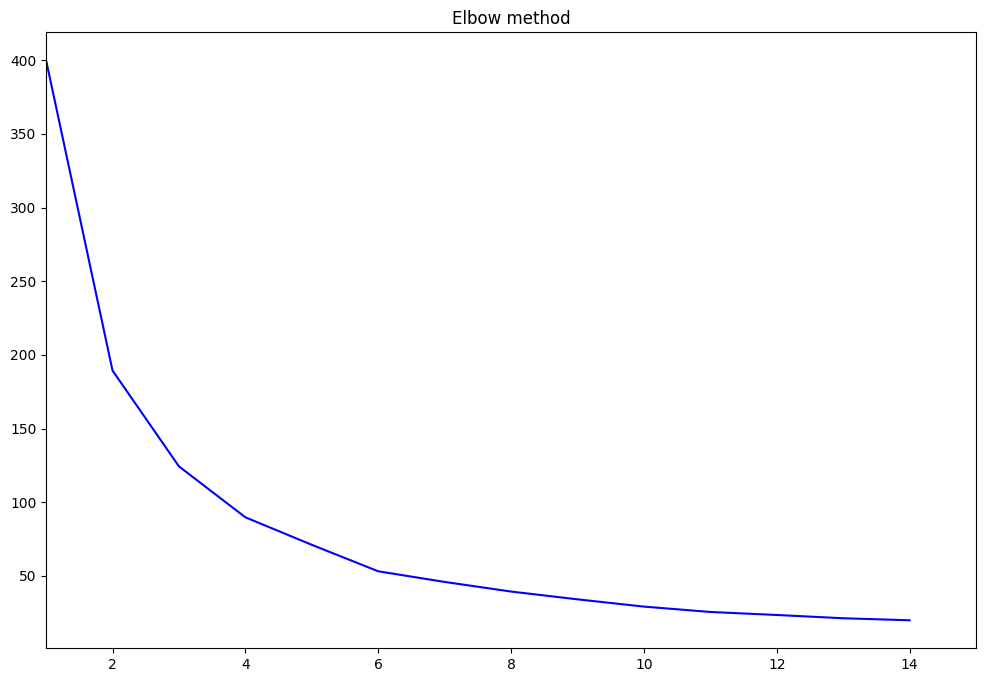

In [141]:
plt.figure(figsize=(12,8))
plt.plot(range(1,15),inertia_list,color="blue")
plt.xlim(1,15)
plt.title("Elbow method")
plt.show()

SO Optimum number of clusters are 4

#So creating this object for 4 clusters

In [142]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=101)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=101)

In [143]:
kmeans.__dict__

{'n_clusters': 4,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'warn',
 'verbose': 0,
 'random_state': 101,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['Age', 'Spending Score (1-100)'], dtype=object),
 'n_features_in_': 2,
 '_tol': 0.00010000000000000005,
 '_n_init': 10,
 '_algorithm': 'lloyd',
 '_n_threads': 2,
 'cluster_centers_': array([[-0.8346466 , -0.39442706],
        [ 0.62833625, -1.36651894],
        [-0.61415725,  1.14971545],
        [ 1.22927178, -0.06558366]]),
 '_n_features_out': 4,
 'labels_': array([0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2,
        1, 2, 3, 0, 0, 0, 3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
        3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
        2, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
        3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 1

#Plotting clusters

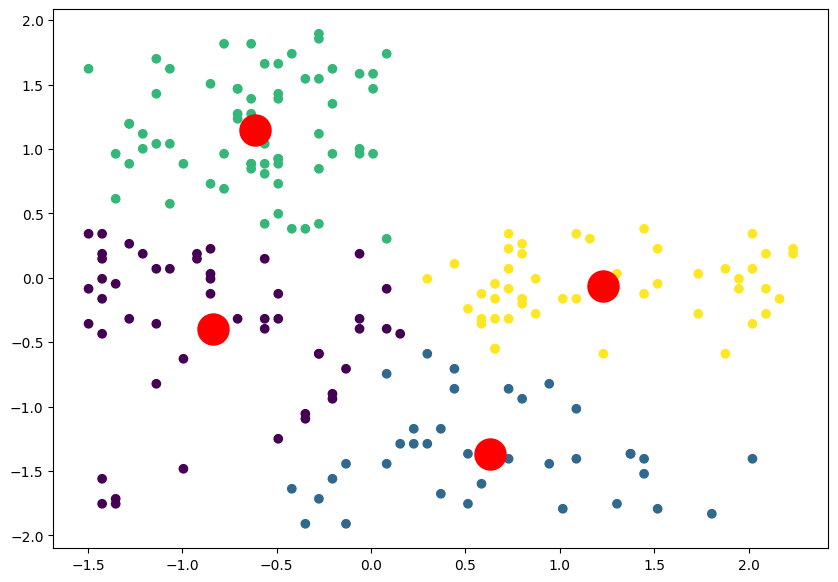

In [144]:
plt.figure(figsize=(10,7))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=500,color="red")

#CReating fdataframe

In [152]:
df_=pd.DataFrame(x,columns=["Age","Spending score(1-100)"])
df_["Group"]=kmeans.labels_

#Conclusion : So here we have best 4 optimal clusters